# Final Analysis

### Research Questions:
1) Chinmay Jain: What type of playstyle (offensive/defensive) leads to most success in each league (Top 5 European Leagues)? 
2) Lakshay Karnwal: Why do teams with the highest xG(expected goals) still end up not winning the league and which factors cause the upset?

### Description of Variables:

- **xG** - expected goals metric, it is a statistical measure of the quality of chances created and conceded.
- **xG_diff** - difference between actual goals scored and expected goals.
- **npxG** - expected goals without penalties and own goals.
- **xGA** - expected goals against.
- **xGA_diff** - difference between actual goals missed and expected goals against.
- **npxGA** - expected goals against without penalties and own goals.
- **npxGD** - difference between "for" and "against" expected goals without penalties and own goals.
- **ppda_coef** - passes allowed per defensive action in the opposition half (power of pressure)
- **oppda_coef** - opponent passes allowed per defensive action in the opposition half (power of opponent's pressure)
- **deep** - passes completed within an estimated 20 yards of goal (crosses excluded)
- **deep_allowed** - opponent passes completed within an estimated 20 yards of goal (crosses excluded)
- **xpts** - expected points
- **xpts_diff** - difference between actual and expected points

# Research Question #1

In [1]:
from ChinmayJain.Scripts import project_functions as pf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2
from importlib import reload

### Simplified Data Set

In [2]:
df = pf.load_and_process("../data/raw/understat.com.csv")
df.to_csv (r'../data/processed/processed_df_cj.csv', index = False, header=True)
df = df.drop(columns=['League', 'Year', 'team', 'matches', 'pts'])
df

,position,xG,xGA,ppda_coef,oppda_coef,deep,deep_allowed
0,1,102.980152,28.444293,5.683535,16.367593,489,114
1,2,95.766243,42.607198,10.209085,12.929510,351,153
2,3,57.047670,29.069107,8.982028,9.237091,197,123
3,4,55.062500,39.392572,8.709827,7.870225,203,172
4,5,69.526624,47.862742,8.276148,9.477805,305,168
...,...,...,...,...,...,...,...
583,16,27.378050,39.300382,14.308293,9.703021,111,176
584,17,29.651493,37.725643,10.718417,10.496213,93,133
585,18,30.193755,40.473400,12.457197,9.054791,109,159
586,19,25.619869,38.426209,12.449507,9.917285,101,148


### Correlation Matrix: 

In [3]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,position,xG,xGA,ppda_coef,oppda_coef,deep,deep_allowed
position,1.000000,-0.729828,0.707865,0.465039,-0.576000,-0.630025,0.593508
xG,-0.729828,1.000000,-0.487197,-0.466051,0.683941,0.863404,-0.447663
xGA,0.707865,-0.487197,1.000000,0.443145,-0.507379,-0.447804,0.806889
ppda_coef,0.465039,-0.466051,0.443145,1.000000,-0.237597,-0.411445,0.537217
oppda_coef,-0.576000,0.683941,-0.507379,-0.237597,1.000000,0.705427,-0.476374
deep,-0.630025,0.863404,-0.447804,-0.411445,0.705427,1.000000,-0.368620
deep_allowed,0.593508,-0.447663,0.806889,0.537217,-0.476374,-0.368620,1.000000


Our offensive variables are xG, ppda_coef, deep and our defensive variables xGA, oppda_coef, deep_allowed. So using of correlation of each varible to position we can determine the weight of each variable for the offensive and defensive average.
- Offensive: 45% xG, 25% ppda_coef, 30% deep
- Defensive: 40% xGA, 30% oppda_coef, 30% deep_allowed

### Filtering and Processing the raw dataset: 

In [4]:
reload(pf)
#Exporting processed data for Tableau
df_av_league = pf.weighted_av_league("../data/raw/understat.com.csv")
display(df_av_league)
df_av_league.to_csv (r'../data/processed/processed_df_av_league_cj.csv', index = False, header=True)

#Exporting processed data for Tableau
df_av_top = pf.weighted_av_top("../data/raw/understat.com.csv")
display(df_av_top)
df_av_top.to_csv (r'../data/processed/processed_df_av__top_cj.csv', index = False, header=True)

#Exporting processed data for Tableau
df_av1 = pf.weighted_av("../data/raw/understat.com.csv")
country = ['Germany','Germany','United Kingdom','United Kingdom', 'Spain', 'Spain', 'France', 'France', 'Italy', 'Italy']
df_av1['Country']=country
df_av1.to_csv (r'../data/processed/processed_df_av_cj.csv', index = False, header=True)

df_av = pf.weighted_av("../data/raw/understat.com.csv")
display(df_av)


,League,pts,xG,xGA,ppda_coef,oppda_coef,deep,deep_allowed,Offensive W_Average,Defensive W_Average
0,La_liga,52.225000,50.590325,50.590325,9.654516,9.654516,214.000000,214.000000,89.379275,87.332485
1,EPL,52.450000,50.762647,50.762647,11.847171,11.847171,249.566667,249.566667,100.674984,98.729210
2,Bundesliga,46.824074,48.699397,48.699397,11.170879,11.170879,202.935185,202.935185,85.588004,83.711578
3,Serie_A,52.125000,51.026213,51.026213,11.054684,11.050871,227.450000,227.450000,93.960467,91.960746
4,Ligue_1,49.758333,45.141445,45.141445,11.028938,11.032684,171.991667,171.991667,74.668385,72.963883


,League,pts,xG,xGA,ppda_coef,oppda_coef,deep,deep_allowed,Offensive W_Average,Defensive W_Average
0,La_liga_topTeam,90.833333,92.228056,36.505663,8.137579,14.943445,445.166667,156.000000,177.087020,65.885299
1,EPL_topTeam,93.000000,76.534052,32.496773,9.441893,19.666714,435.166667,162.000000,167.350797,67.498723
2,Bundesliga_topTeam,82.166667,79.799526,27.382881,7.330245,23.839114,398.500000,107.333333,157.292348,50.304886
3,Serie_A_topTeam,89.500000,64.722223,30.055285,9.644669,13.686024,287.666667,139.666667,117.836168,58.027921
4,Ligue_1_topTeam,87.666667,83.724212,29.802266,7.814924,17.835084,358.166667,121.000000,147.079626,53.571432


,League,Offensive W_Average,Defensive W_Average
0,Bundesliga,85.588004,83.711578
1,Bundesliga_topTeam,157.292348,50.304886
2,EPL,100.674984,98.729210
3,EPL_topTeam,167.350797,67.498723
4,La_liga,89.379275,87.332485
5,La_liga_topTeam,177.087020,65.885299
6,Ligue_1,74.668385,72.963883
7,Ligue_1_topTeam,147.079626,53.571432
8,Serie_A,93.960467,91.960746
9,Serie_A_topTeam,117.836168,58.027921


### Graphing the Offensive and Defensive Weighted Average:

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

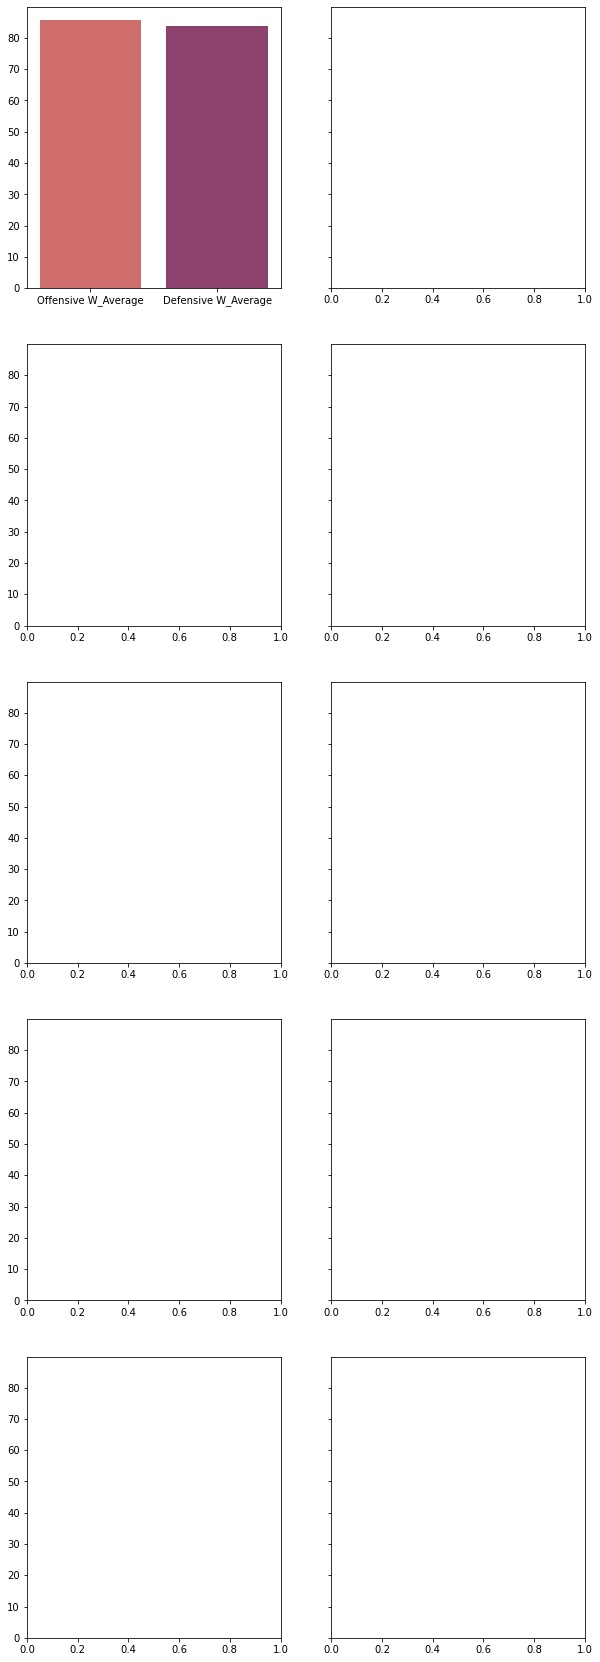

In [5]:
fig, axes = plt.subplots(5, 2, figsize=(10,30),sharey=True)
plt.rcParams['font.family'] = "serif"
sns.set_context(font_scale=1.5)
#fig.suptitle('Comparing the Top Teams and their League in Regards to their Offensive and Defensive Weighted Average ')
ax = sns.barplot(ax = axes[0,0], data = df_av.iloc[0:1], palette='flare')
ax.bar_label(ax.containers[0])
ax2 = sns.barplot(ax = axes[0,1], data = df_av.iloc[1:2], palette='flare')
ax2.bar_label(ax2.containers[0])
ax3 = sns.barplot(ax = axes[1,0], data = df_av.iloc[2:3], palette='flare')
ax3.bar_label(ax3.containers[0])
ax4 = sns.barplot(ax = axes[1,1], data = df_av.iloc[3:4], palette='flare')
ax4.bar_label(ax4.containers[0])
ax5 = sns.barplot(ax = axes[2,0], data = df_av.iloc[4:5], palette='flare')
ax5.bar_label(ax5.containers[0])
ax6 = sns.barplot(ax = axes[2,1], data = df_av.iloc[5:6], palette='flare')
ax6.bar_label(ax6.containers[0])
ax7 = sns.barplot(ax = axes[3,0], data = df_av.iloc[6:7], palette='flare')
ax7.bar_label(ax7.containers[0])
ax8 = sns.barplot(ax = axes[3,1], data = df_av.iloc[7:8], palette='flare')
ax8.bar_label(ax8.containers[0])
ax9 = sns.barplot(ax = axes[4,0], data = df_av.iloc[8:9], palette='flare')
ax9.bar_label(ax9.containers[0])
ax10 = sns.barplot(ax = axes[4,1], data = df_av.iloc[9:10], palette='flare')
ax10.bar_label(ax10.containers[0])

axes[0,0].set_title('Bundesliga')
axes[0,1].set_title('Bungesliga Winners')
axes[1,0].set_title('EPL')
axes[1,1].set_title('EPL Winners')
axes[2,0].set_title('La Liga')
axes[2,1].set_title('La Liga Winners')
axes[3,0].set_title('Ligue 1')
axes[3,1].set_title('Ligue 1 Winners')
axes[4,0].set_title('Serie A')
axes[4,1].set_title('Serie A Winners')

In [ ]:
plt.figure(figsize=(11,6))
fig = sns.scatterplot(data = df_av, y='League', x='Offensive W_Average')
fig = sns.scatterplot(data = df_av, y='League', x='Defensive W_Average')
fig.set_title("Comparing the League and their Top Team's Weighted Averages")
fig.set_xlabel("Weighted Defensive and Offensive Average")
plt.legend(["W_Offensive Average", "W_Defensive Average"])
plt.show()

#### Observations/Analysis

- **Bundesliga**
    - The league as whole plays slightly more offensively but it is still quite balanced.
    - The league winners play very offensively so in the Bundesliga offensive teams have more success.
- **EPL**
    - The EPL has the highest offensive and defensive averages compared to the other leagues and it also plays slightly more offensively. 
    - The league winners play very offensively but EPL winners have the highest defensive average compared to other league winners. So in the EPL offensive teams have more success but they still need to have a reliable defensive backline.
- **La Liga**
    - The La Liga is a slightly more offense based league.
    - The La Liga winners have the highest offensive average compared to the other winners so in the La Liga the teams need to have a strong group of forwards in order to be successful
- **Ligue 1**
    - The Ligue 1 has the lowest offensive and defensive averages which indicates that they have the weakest teams.
    - The Ligue 1 winners are more offensive so in the Ligue 1 teams have to be very offensive in order to be successful.
- **Serie A**
    - The Serie A is 2nd in both offensive and defensive averages and the averages are close so teams have to be offensive and defensively strong.
    - The Serie A winners have the lowest offensive score compared to the other winners but they are still very offensive heavy

**Conclusion:** Our results are interesting as it shows that in every league the winners are quite offensive heavy, but each league is slightly different in how offensively and defensively they play.

# Research Question #2

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from importlib import reload
from LakshayKarnwal.Scripts import project_functions as pf

### Simplified Data Set

In [ ]:
#stored the location of data
path= "../data/raw/understat.com.csv"

#load, clean and process data
df = pf.load_and_process(path)
display(df)
#exporting processed data into a csv file for our dashboard
df.to_csv (r'../data/processed/processed_df.csv', index = False, header=True)

### Graphing Team's effect on opponent:

In [ ]:
#set up color theme for the plots
colors = ['#ff9999','#99ff99', '#B7C3F3', '#DD7596']

#extracts data of teams that have higher xG than the winning team in EPL 2014 
df1= pf.filter_data_set('EPL',2014,path)
df1.to_csv (r'../data/processed/processed_df_EPL_2014.csv', index = False, header=True)
display(df1)
#plots the graph for team's effect on opponent
fig, ax = plt.subplots()
pf.bar_plot(ax, df1, total_width=0.3, single_width=0.7, chart_value=1,colors=colors)
sns.despine()
plt.show()

#extracts data of teams that have higher xG than the winning team in Serie A 2014
df2= pf.filter_data_set('Serie_A',2014, path)
display(df2)
#plots the graph for team's effect on opponent
fig, ax = plt.subplots()
pf.bar_plot(ax, df2, total_width=0.3, single_width=0.7, chart_value=1,colors=colors)
sns.despine()
plt.show()

#extracts data of teams that have higher xG than the winning team in Ligue 1 2016
df3= pf.filter_data_set('Ligue_1',2016, path)
display(df3)
#plots the graph for team's effect on opponent
fig, ax = plt.subplots()
pf.bar_plot(ax, df3, total_width=0.3, single_width=0.7, chart_value=1,colors=colors)
sns.despine()
plt.show()

#extracts data of teams that have higher xG than the winning team in La liga 2017
df4= pf.filter_data_set('La_liga',2017, path)
display(df4)
#plots the graph for team's effect on opponent
fig, ax = plt.subplots()
pf.bar_plot(ax, df4, total_width=0.3, single_width=0.7, chart_value=1,colors=colors)
sns.despine()
plt.show()

In [ ]:
all_cases=pf.all_cases(path)
#display(all_cases)

### Graphing Opponent's effect on team:

In [ ]:
colors = ['#ff9999','#99ff99', '#B7C3F3', '#DD7596']

#extracts data of teams that have higher xG than the winning team in EPL 2014 
df1= pf.filter_data_set('EPL',2014, path)
display(df1)
#plots the graph for opponent's effect on team
fig, ax = plt.subplots()
pf.bar_plot(ax, df1, total_width=0.3, single_width=0.7, chart_value=2,colors=colors)
sns.despine()
plt.show()

#extracts data of teams that have higher xG than the winning team in Serie A 2014 
df1= pf.filter_data_set('Serie_A',2014, path)
display(df1)
#plots the graph for opponent's effect on team
fig, ax = plt.subplots()
pf.bar_plot(ax, df1, total_width=0.3, single_width=0.7, chart_value=2,colors=colors)
sns.despine()
plt.show()

#extracts data of teams that have higher xG than the winning team in Ligue 1 2016 
df1= pf.filter_data_set('Ligue_1',2016, path)
display(df1)
#plots the graph for opponent's effect on team
fig, ax = plt.subplots()
pf.bar_plot(ax, df1, total_width=0.3, single_width=0.7, chart_value=2,colors=colors)
sns.despine()
plt.show()

#extracts data of teams that have higher xG than the winning team inLa liga 2017
df1= pf.filter_data_set('La_liga',2017, path)
display(df1)
#plots the graph for opponent's effect on team
fig, ax = plt.subplots()
pf.bar_plot(ax, df1, total_width=0.3, single_width=0.7, chart_value=2,colors=colors)
sns.despine()
plt.show()

### Graphing net effect of each team:

#### Correlation Matrix:

In [ ]:
#printing out the correlation matrix to find the correlation between all variables and position of the team in the league
corr = df.corr()
corr.style.background_gradient(cmap="Greens")

The analysis is divided into two parts:
1) Team's effect on opponent (includes variables: expected goals (xG), goals scored (scored), and pressure)
2) Opponent's effect on team (includes variables: expected goals against (xGA), goals conceded (conceded), and opposition pressure (oppo_pressure))

To find out the weighted average, I used the correlation between the position variable and the rest of the variables using the correlation matrix.

The results were:
1) Team's effect on opponent: 24% pressure, 37% xG, 39% scored
2) Opponent's effect on team: 28% oppo_pressure, 34% xGA, 38% conceded

#### Graphing weighted average of Team's effect on opponent, Oppenent's effect on team, and net team effect:

The following graphs includes presentation of weighted averages of team's effect and opponent's effect and finally the net weighted average calculated using the correlation matrix.

NOTE: 
For the weighted average of Team's effect on opponent, higher the value better is the team's attacking performance 

For the weighted average of Opponent's effect on teams, lower the value better is the team's defensive performace

For the net value, higher the value, better is the overall chances of the team ranking higher in the table

In [ ]:
colors1 = ['#ff9999','#99ff99', '#B7C3F3']
colors2 = ['#99ff99']
colors3 = ['#B7C3F3']

#method call to graph team's effect on opponent, opponent's effect on team and net effect of team
df1=pf.weighted_avg_attack('EPL',2014, path)
df2=df1.style.set_table_attributes("style='display:inline'").set_caption('Weighted avg. of team'+'s effect on opponent')
display(df2)
fig, ax = plt.subplots()
pf.bar_plot(ax, df2, total_width=0.3, single_width=0.7, chart_value=3,colors=colors1)
sns.despine()
plt.show()

df3=pf.weighted_avg_def('EPL',2014, path)
df4=df3.style.set_caption('Weighted avg. of opponent'+'s effect on team')
display(df4)
fig, ax = plt.subplots()
pf.bar_plot(ax, df4, total_width=0.3, single_width=0.7, chart_value=3,colors=colors2)
sns.despine()
plt.show()

df4=pf.weighted_avg_net('EPL',2014, path)
df5=df4.style.set_table_attributes("style='display:inline'").set_caption('Net effect of each team')
display(df5)
fig, ax = plt.subplots()
pf.bar_plot(ax, df5, total_width=0.3, single_width=0.7, chart_value=3,colors=colors3)
sns.despine()
plt.show()

In [ ]:
avg_attack=pf.all_avg_attack(path)
#display(avg_attack)

In [ ]:
avg_def=pf.all_avg_def(path)
#display(avg_def)

In [ ]:
avg_net=pf.all_avg_net(path)
#display(avg_net)

In [ ]:
#method call to graph team's effect on opponent, opponent's effect on team and net effect of team
colors1 = ['#ff9999','#99ff99', '#B7C3F3']
colors2 = ['#99ff99']
colors3 = ['#B7C3F3']

#method call to graph team's effect on opponent, opponent's effect on team and net effect of team
df1=pf.weighted_avg_attack('Serie_A',2014, path)
df2=df1.style.set_table_attributes("style='display:inline'").set_caption('Weighted avg. of team'+'s effect on opponent')
display(df2)
fig, ax = plt.subplots()
pf.bar_plot(ax, df2, total_width=0.3, single_width=0.7, chart_value=3,colors=colors1)
sns.despine()
plt.show()

df3=pf.weighted_avg_def('Serie_A',2014, path)
df4=df3.style.set_caption('Weighted avg. of opponent'+'s effect on team')
display(df4)
fig, ax = plt.subplots()
pf.bar_plot(ax, df4, total_width=0.3, single_width=0.7, chart_value=3,colors=colors2)
sns.despine()
plt.show()

df4=pf.weighted_avg_net('Serie_A',2014, path)
df5=df4.style.set_table_attributes("style='display:inline'").set_caption('Net effect of each team')
display(df5)
fig, ax = plt.subplots()
pf.bar_plot(ax, df5, total_width=0.3, single_width=0.7, chart_value=3,colors=colors3)
sns.despine()
plt.show()

In [ ]:
#method call to graph team's effect on opponent, opponent's effect on team and net effect of team
#pf.weighted_avg('Ligue_1',2016, path)
colors1 = ['#ff9999','#99ff99', '#B7C3F3']
colors2 = ['#99ff99']
colors3 = ['#B7C3F3']

#method call to graph team's effect on opponent, opponent's effect on team and net effect of team
df1=pf.weighted_avg_attack('Ligue_1',2016, path)
df2=df1.style.set_table_attributes("style='display:inline'").set_caption('Weighted avg. of team'+'s effect on opponent')
display(df2)
fig, ax = plt.subplots()
pf.bar_plot(ax, df2, total_width=0.3, single_width=0.7, chart_value=3,colors=colors1)
sns.despine()
plt.show()

df3=pf.weighted_avg_def('Ligue_1',2016, path)
df4=df3.style.set_caption('Weighted avg. of opponent'+'s effect on team')
display(df4)
fig, ax = plt.subplots()
pf.bar_plot(ax, df4, total_width=0.3, single_width=0.7, chart_value=3,colors=colors2)
sns.despine()
plt.show()

df4=pf.weighted_avg_net('Ligue_1',2016, path)
df5=df4.style.set_table_attributes("style='display:inline'").set_caption('Net effect of each team')
display(df5)
fig, ax = plt.subplots()
pf.bar_plot(ax, df5, total_width=0.3, single_width=0.7, chart_value=3,colors=colors3)
sns.despine()
plt.show()

In [ ]:
#method call to graph team's effect on opponent, opponent's effect on team and net effect of team
#pf.weighted_avg('La_liga',2017, path)
colors1 = ['#ff9999','#99ff99', '#B7C3F3']
colors2 = ['#99ff99']
colors3 = ['#B7C3F3']

#method call to graph team's effect on opponent, opponent's effect on team and net effect of team
df1=pf.weighted_avg_attack('La_liga',2017, path)
df2=df1.style.set_table_attributes("style='display:inline'").set_caption('Weighted avg. of team'+'s effect on opponent')
display(df2)
fig, ax = plt.subplots()
pf.bar_plot(ax, df2, total_width=0.3, single_width=0.7, chart_value=3,colors=colors1)
sns.despine()
plt.show()

df3=pf.weighted_avg_def('La_liga',2017, path)
df4=df3.style.set_caption('Weighted avg. of opponent'+'s effect on team')
display(df4)
fig, ax = plt.subplots()
pf.bar_plot(ax, df4, total_width=0.3, single_width=0.7, chart_value=3,colors=colors2)
sns.despine()
plt.show()

df4=pf.weighted_avg_net('La_liga',2017, path)
df5=df4.style.set_table_attributes("style='display:inline'").set_caption('Net effect of each team')
display(df5)
fig, ax = plt.subplots()
pf.bar_plot(ax, df5, total_width=0.3, single_width=0.7, chart_value=3,colors=colors3)
sns.despine()
plt.show()

### Observations/Analysis

According to the performed EDA, it is very clear that there are many factors apart from xG that influence the position of a team in their particular league.

In the graphs shown above, the team that ended up winning the league usually had a higher net value than the teams that only had higher xG. The net values were calculated by finding the difference between team's effect and opponents effect

**Net value = Team's effect on opponent - Opponent's effect on team**

Each of the values that effect the net value were calculated using metrics such as: xG, pressure, scored, xGA, oppo_pressure, conceded.The weight of these values were found out using the correlation matrix:

xG: 37%
pressure: 24%
scored: 39%
xGA: 34%
oppo_pressure: 28%
conceded: 38%

In [ ]:
#setting up the values and labels of the pie chart
team_effect_weights= [37,24,39]
parameters= ['xG','pressure','scored']

#display the 3d pie chart
pf.plot_pie(team_effect_weights,parameters)
plt.title("Weight of each attacking parameter\n" + "for calcualted weighted average\n")
plt.show()

In [ ]:
#setting up the values and labels of the pie chart
oppo_effect_weights= [34,28,38]
parameters= ['xGA','oppo_pressure','conceded']

#display the 3d pie chart
pf.plot_pie(oppo_effect_weights,parameters)
plt.title("Weight of each defensive parameter\n" + "for calcualted weighted average\n")
plt.show()

### Conclusion

As you can see weight of xG is only 37%. Therefore, teams with the highest xG sometimes end up not winning the league. This is because there are other factors such as pressure, oppo_pressure, xGA, and conceded that determine the position of a team.